## Testing
---

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import palettable as pl
st = plt.style.available[23]
plt.style.use(st)
emr = pl.cartocolors.sequential.Emrld_7.get_mpl_colormap()

In [95]:
from quantum_mechanics import matrix_box_potential, get_coeffs, solve_egenvalues
from plot_functions import *

In [ ]:
N = 10000
A = matrix_box_potential(N,order=6)
e, v = solve_egenvalues(A)

In [ ]:
n = np.arange(1,N+1)
en = np.pi**2 *n**2

In [ ]:
e_vs_lambda(e)

In [ ]:
e_vs_n(e)

In [75]:
from scipy.integrate import simps

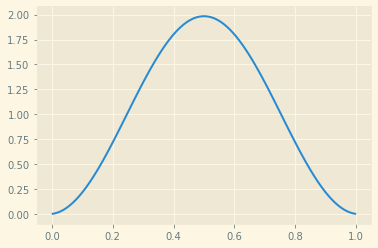

In [79]:
plt.plot(x, np.abs(np.sqrt(N)*v[:,0])**2)

---

In [11]:
def psi(e, v, psi_0, t):
    cn = get_coeffs(psi_0, v)
    return cn * np.exp(-1j * e * t[:,np.newaxis]) @ v.T
#     s = np.zeros_like(v[:,0])
#     for n in range(len(cn)):
#         s = s + cn[n]*np.exp(-1j*e[n]*t[:,np.newaxis])*v[:,n]
#     return s

In [77]:
x= np.linspace(0,1,N)

In [13]:
psi_0 = np.sqrt(2)*np.sin(np.pi*x)

In [14]:
t=  np.linspace(0,1)

In [17]:
PSI = psi(e, v, v[:,0], t)

C:\Users\KarlKristian\Anaconda3\envs\numfys\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


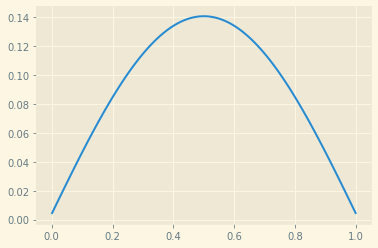

In [18]:
plt.plot(x, PSI[0])